# Link for the dataset

https://www.kaggle.com/c/bluebook-for-bulldozers/overview

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn 

## Exploring and preprocessing the data

In [91]:
# Importing training and validation dataframe

df = pd.read_csv('bluebook-for-bulldozers/TrainAndValid.csv', low_memory=False)

In [92]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [94]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

<AxesSubplot:ylabel='Frequency'>

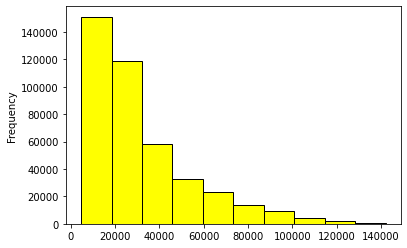

In [95]:
df.SalePrice.plot.hist(color='yellow', edgecolor='black')

In [96]:
# Parsing dates
# Importing data again with data parsing this time

df = pd.read_csv('bluebook-for-bulldozers/TrainAndValid.csv', 
                 low_memory=False,
                 parse_dates=['saledate'])

In [97]:
df.saledate[:10]

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
5   2008-12-18
6   2004-08-26
7   2005-11-17
8   2009-08-27
9   2007-08-09
Name: saledate, dtype: datetime64[ns]

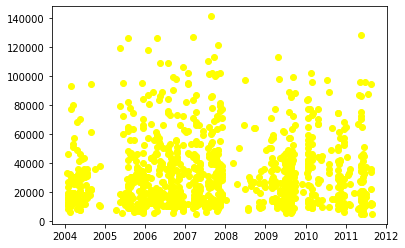

In [98]:
fig, ax = plt.subplots()
ax.scatter(df['saledate'][:1000], 
           df['SalePrice'][:1000], 
           color='yellow')

In [99]:
# Sorting dataframe by 'saledate' column

In [100]:
df = df.sort_values(by='saledate')
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


In [101]:
# Making a copy of data 

df_tmp = df.copy()

In [102]:
df_tmp['saleYear'] = df_tmp.saledate.dt.year
df_tmp['saleMonth'] = df_tmp.saledate.dt.month
df_tmp['saleDay'] = df_tmp.saledate.dt.day
df_tmp['saleDayOfWeek'] = df_tmp.saledate.dt.dayofweek
df_tmp['saleDayOfYear'] = df_tmp.saledate.dt.dayofyear

In [103]:
# After adding new date columns to our DF, we can drop 'saledate' column

df_tmp.drop('saledate', axis=1, inplace=True)

In [106]:
# Building a for loop to find the 'str' columns and making dtype 'category'

for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype('category').cat.as_ordered()

In [107]:
# Let's look at the percentage of missing values in each column

df_tmp.isnull().sum()/len(df_tmp)*100

SalesID                      0.000000
SalePrice                    0.000000
MachineID                    0.000000
ModelID                      0.000000
datasource                   0.000000
auctioneerID                 4.879113
YearMade                     0.000000
MachineHoursCurrentMeter    64.258610
UsageBand                   82.149174
fiModelDesc                  0.000000
fiBaseModel                  0.000000
fiSecondaryDesc             34.099269
fiModelSeries               85.784520
fiModelDescriptor           81.871490
ProductSize                 52.485110
fiProductClassDesc           0.000000
state                        0.000000
ProductGroup                 0.000000
ProductGroupDesc             0.000000
Drive_System                74.051970
Enclosure                    0.080931
Forks                       52.092087
Pad_Type                    80.349796
Ride_Control                62.992794
Stick                       80.349796
Transmission                54.444412
Turbocharged

In [108]:
# Filling missing values
# Numerical first

for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df_tmp[label+"_is_missing"] = pd.isnull(content)
            df_tmp[label] = content.fillna(content.median())

In [109]:
# Looking at columns which are not numeric and how many missing values they have

for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(f"{label} - {str(df_tmp[label].isna().sum())}")

UsageBand - 339028
fiModelDesc - 0
fiBaseModel - 0
fiSecondaryDesc - 140727
fiModelSeries - 354031
fiModelDescriptor - 337882
ProductSize - 216605
fiProductClassDesc - 0
state - 0
ProductGroup - 0
ProductGroupDesc - 0
Drive_System - 305611
Enclosure - 334
Forks - 214983
Pad_Type - 331602
Ride_Control - 259970
Stick - 331602
Transmission - 224691
Turbocharged - 331602
Blade_Extension - 386715
Blade_Width - 386715
Enclosure_Type - 386715
Engine_Horsepower - 386715
Hydraulics - 82565
Pushblock - 386715
Ripper - 305753
Scarifier - 386704
Tip_Control - 386715
Tire_Size - 315060
Coupler - 192019
Coupler_System - 367724
Grouser_Tracks - 367823
Hydraulics_Flow - 367823
Track_Type - 310505
Undercarriage_Pad_Width - 309782
Stick_Length - 310437
Thumb - 310366
Pattern_Changer - 310437
Grouser_Type - 310505
Backhoe_Mounting - 331986
Blade_Type - 330823
Travel_Controls - 330821
Differential_Type - 341134
Steering_Controls - 341176


In [110]:
# Turning categorical variables into numbers and filling missing

for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_tmp[label+'_is_missing'] = pd.isnull(content)
        df_tmp[label] = pd.Categorical(content).codes + 1

In [117]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
205615,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
274835,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,True,True,True,True,True,True,True,True,False,False
141296,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,True,True,True,True,True,False,False,False,True,True
212552,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,True,True,True,True,True,True,True,True,False,False
62755,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,...,True,True,True,True,True,False,False,False,True,True


In [113]:
#No missing values

df_tmp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

## Modelling

In [120]:
# Splitting data into train and validation sets

df_val = df_tmp[df_tmp.saleYear == 2012]
df_train = df_tmp[df_tmp.saleYear != 2012]

In [122]:
# Splitting data into X and y

X_train, y_train = df_train.drop('SalePrice', axis=1), df_train.SalePrice
X_valid, y_valid = df_val.drop('SalePrice', axis=1), df_val.SalePrice

In [128]:
# Creating an evaluation function

from sklearn.metrics import mean_absolute_error, mean_squared_log_error, r2_score

def rmsle(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {'Training MAE': mean_absolute_error(y_train, train_preds),
              'Valid MAE': mean_absolute_error(y_valid, val_preds),
              'Training RMSLE': rmsle(y_train, train_preds),
              'Valid RMSLE': rmsle(y_valid, val_preds),
              'Training R^2': r2_score(y_train, train_preds),
              'Valid R^2': r2_score(y_valid, val_preds)}
    return scores

In [126]:
%%time
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42,
                              max_samples=10000)
model.fit(X_train, y_train)

CPU times: total: 47.9 s
Wall time: 10.8 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [129]:
show_scores(model)

{'Training MAE': 5561.2988092240585,
 'Valid MAE': 7177.26365505919,
 'Training RMSLE': 0.257745378256977,
 'Valid RMSLE': 0.29362638671089003,
 'Training R^2': 0.8606658995199189,
 'Valid R^2': 0.8320374995090507}

## Tuning hyperparameters with RandomizedSearchCV

In [137]:
from sklearn.model_selection import RandomizedSearchCV

# RFR hyperparamters
rf_grid = {'n_estimators': np.arange(10,100,10),
           'max_depth': [None, 3, 5, 10],
           'min_samples_split': np.arange(2,20,2),
           'min_samples_leaf': np.arange(1, 20, 2),
           'max_features': [0.5, 1, 'sqrt', 'auto'],
           'max_samples': [10000]}

rs = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                              random_state=42), 
                        param_distributions=rf_grid,
                        n_iter=20,
                        cv=5,
                        verbose=True)
                                             
rs.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [138]:
# Looking at best parameters

rs.best_params_

{'n_estimators': 70,
 'min_samples_split': 14,
 'min_samples_leaf': 3,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': None}

In [139]:
show_scores(rs)

{'Training MAE': 5809.775274290974,
 'Valid MAE': 7362.83772720675,
 'Training RMSLE': 0.2660820833158463,
 'Valid RMSLE': 0.29692560576162713,
 'Training R^2': 0.84642147303606,
 'Valid R^2': 0.8175949660973024}

## Predictions on test data

In [143]:
df_test = pd.read_csv('bluebook-for-bulldozers/Test.csv',
                      low_memory=False,
                      parse_dates=['saledate'])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [144]:
df_test.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter    10328
UsageBand                   10623
saledate                        0
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              3975
fiModelSeries               10451
fiModelDescriptor            9433
ProductSize                  6409
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                 9698
Enclosure                       2
Forks                        6149
Pad_Type                    10349
Ride_Control                 8216
Stick                       10349
Transmission                 7639
Turbocharged                10349
Blade_Extension             11806
Blade_Width                 11806
Enclosure_Type

In [146]:
df_test.dtypes

SalesID                              int64
MachineID                            int64
ModelID                              int64
datasource                           int64
auctioneerID                         int64
YearMade                             int64
MachineHoursCurrentMeter           float64
UsageBand                           object
saledate                    datetime64[ns]
fiModelDesc                         object
fiBaseModel                         object
fiSecondaryDesc                     object
fiModelSeries                       object
fiModelDescriptor                   object
ProductSize                         object
fiProductClassDesc                  object
state                               object
ProductGroup                        object
ProductGroupDesc                    object
Drive_System                        object
Enclosure                           object
Forks                               object
Pad_Type                            object
Ride_Contro

In [147]:
# Preprocessing test dataframe exact same way as train dataframe

df_test['saleYear'] = df_test.saledate.dt.year
df_test['saleMonth'] = df_test.saledate.dt.month
df_test['saleDay'] = df_test.saledate.dt.day
df_test['saleDayOfWeek'] = df_test.saledate.dt.dayofweek
df_test['saleDayOfYear'] = df_test.saledate.dt.dayofyear

In [148]:
df_test.drop('saledate', axis=1, inplace=True)

In [149]:
for label, content in df_test.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df_test[label+"_is_missing"] = pd.isnull(content)
            df_test[label] = content.fillna(content.median())

In [150]:
for label, content in df_test.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_test[label+'_is_missing'] = pd.isnull(content)
        df_test[label] = pd.Categorical(content).codes + 1

In [152]:
df_test.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 101, dtype: int64

In [153]:
# Making predictions on preprocessed test data

test_preds = rs.predict(df_test)

c:\users\fanty\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- auctioneerID_is_missing

  warnings.warn(message, FutureWarning)


ValueError: X has 101 features, but RandomForestRegressor is expecting 102 features as input.

In [154]:
# Let's see wich column differs 

set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

In [155]:
df_test['auctioneerID_is_missing'] = False

In [156]:
# Making predictions again

test_preds = rs.predict(df_test)

c:\users\fanty\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [157]:
test_preds

array([19551.13701259, 26351.50749053, 55400.21155432, ...,
       11891.10667904, 15060.63088697, 23527.48303879])

In [158]:
# Formatting predictions into the same way as Kaggle asks

df_preds = pd.DataFrame()
df_preds['SalesID'] = df_test['SalesID']
df_preds['SalesPrice'] = test_preds

In [160]:
df_preds.head()

,SalesID,SalesPrice
0,1227829,19551.137013
1,1227844,26351.507491
2,1227847,55400.211554
3,1227848,80997.586481
4,1227863,38109.707406


## Feature Importance

In [162]:
rs.best_params_

{'n_estimators': 70,
 'min_samples_split': 14,
 'min_samples_leaf': 3,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': None}

In [163]:
final_model = RandomForestRegressor(n_estimators=70,
                                    min_samples_split=14,
                                    min_samples_leaf=3,
                                    max_samples=10000,
                                    max_features='auto',
                                    max_depth= None)

final_model.fit(X_train, y_train)

RandomForestRegressor(max_samples=10000, min_samples_leaf=3,
                      min_samples_split=14, n_estimators=70)

In [164]:
final_model.feature_importances_

array([4.48165671e-02, 1.49412201e-02, 2.54853890e-02, 3.57506818e-04,
       3.05287049e-03, 2.79163870e-01, 2.76065811e-03, 8.54992588e-04,
       1.99930610e-02, 4.61333142e-02, 6.21394370e-02, 3.26417962e-03,
       3.18236459e-03, 2.46484228e-01, 3.18453852e-02, 5.83680782e-03,
       1.32768185e-03, 1.14327845e-03, 1.70443818e-03, 1.33441772e-02,
       2.77890901e-04, 4.87218479e-05, 9.98390526e-04, 1.97329356e-04,
       7.05816469e-04, 1.01138827e-05, 2.44463228e-03, 2.65741942e-02,
       1.69915610e-03, 2.77548458e-03, 4.01803759e-03, 1.51947405e-03,
       2.37862682e-03, 1.08447036e-04, 1.50596982e-03, 2.09087538e-03,
       8.19478002e-04, 1.35765814e-02, 1.89615426e-03, 4.36693134e-04,
       1.02031912e-04, 7.58378001e-04, 1.05278745e-03, 5.16746324e-04,
       4.36505579e-04, 5.06925091e-04, 6.48638351e-05, 1.91055312e-03,
       9.35008883e-04, 1.39425337e-04, 2.22699860e-04, 6.62671238e-02,
       1.86324061e-03, 6.70024144e-03, 2.73771536e-03, 8.60763421e-03,
      

In [178]:
# Plotting feature importances using a fuction

def plot(columns, importances, n=20):
    df = (pd.DataFrame({'features':columns,
                       'feature_importances': importances})
    .sort_values('feature_importances', ascending=False)
    .reset_index(drop=True))
    
    fig, ax = plt.subplots()
    ax.barh(df['features'][:n], df['feature_importances'][:20])
    ax.set_ylabel('Features')
    ax.set_xlabel('Feature Importance')
    ax.invert_yaxis()

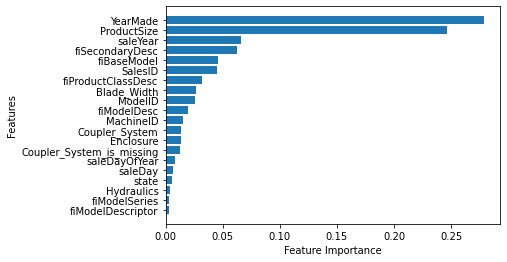

In [179]:
plot(X_train.columns, final_model.feature_importances_)